In [2]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fn = 'EvA.matrix.tsv'
data = np.genfromtxt(fn, delimiter='\t', skip_header=1, dtype=int)
data

array([[-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       ...,
       [-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0]])

In [4]:
data_T = data[:,1:]
data_T = data_T.T
data_T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
data_T.shape

(362, 12279)

In [6]:
pca = PCA(n_components=5)
data_p = pca.fit_transform(data_T)
pca.explained_variance_ratio_

array([0.8755178 , 0.05089961, 0.01929243, 0.01038331, 0.00565116])

In [7]:
c0 = pca.components_[0]
sum(c0 != 0)

1403

Text(0, 0.5, 'Count')

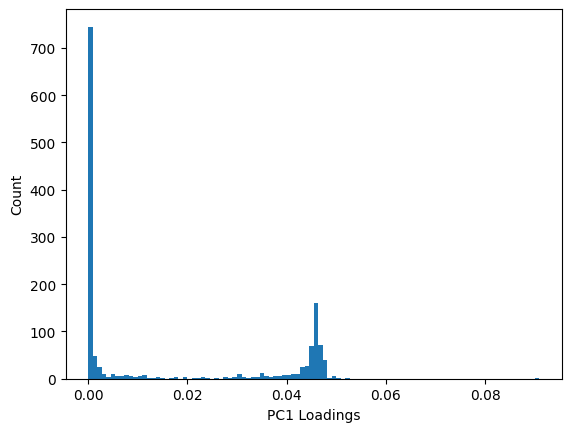

In [8]:
plt.hist(c0[c0 != 0], bins=100)
plt.xlabel('PC1 Loadings')
plt.ylabel('Count')

In [9]:
#gene count + variance explained above threshold
t = 4e-2
sum(c0 > t), sum(c0[c0 > t]) / sum(c0)

(432, 0.8529777508843309)

In [10]:
# fetch genes
outlier_idx = np.where(c0 > 0)[0]
print(len(outlier_idx))

outlier_genes = []
betalactam_count = 0
with open(fn, 'r') as f:
    for i, line in enumerate(f):
        if (i-1) in outlier_idx:
            outlier_genes.append(line.split('\t', 1)[0])
        if 'beta-lactam' in line:
            betalactam_count += 1

print(betalactam_count)

outlier_genes

1395
2878


['YP_002385298|FEATURES|mdtN|multidrug|mdtN',
 'gi:585322871:ref:WP_024204537.1:|FEATURES|emrA|multidrug|emrA',
 'JQ002629.1.gene1.p01|FEATURES|IMP-32|beta-lactam|IMP',
 'gi:651585284:ref:WP_026580461.1:|FEATURES|class_A|beta-lactam|class_A',
 'Q32DT3|FEATURES|arnA|polymyxin|arnA',
 'gi:585350004:ref:WP_024231618.1:|FEATURES|TolC|multidrug|TolC',
 'gi:1015890335:ref:WP_062865166.1:|FEATURES|macB|MLS|macB',
 'ZP_04273511|FEATURES|class_A|beta-lactam|class_A',
 'gi:1031652761:gb:ANG23007.1:|FEATURES|TEM-1|beta-lactam|TEM',
 'gi:727197287:ref:WP_033658847.1:|FEATURES|class_A|beta-lactam|class_A',
 'gi:662754041:ref:WP_030125200.1:|FEATURES|multidrug_ABC_transporter|multidrug|multidrug_ABC_transporter',
 'gi:1031626545:gb:ANG10578.1:|FEATURES|TEM-1|beta-lactam|TEM',
 'gi:1031635111:gb:ANG14588.1:|FEATURES|TEM-1|beta-lactam|TEM',
 'AF452105.1.gene1.p1|FEATURES|LEN-15|beta-lactam|LEN',
 'DQ075245.1.gene1.p01|FEATURES|TEM-143|beta-lactam|TEM',
 'P52664|FEATURES|class_A|beta-lactam|class_A',
 

In [20]:
# labels
np.unique([x.split('|')[3] for x in outlier_genes], return_counts=True)

(array(['MLS', 'beta-lactam', 'diaminopyrimidine', 'fluoroquinolone',
        'fosfomycin', 'multidrug', 'polymyxin', 'tetracycline'],
       dtype='<U17'),
 array([283, 987,  10,   1,   1, 109,   3,   1]))

In [12]:
# retrieve best hits
best_hit = [(None,0)] * data_T.shape[0]
for line in open('EvA.matrix.tsv', 'r'):
    id = line.split('\t', 1)[0]
    if len(id) < 2: continue
    for i, score in enumerate(line.strip().split('\t')[1:]):
        score = float(score)
        if score > best_hit[i][1]:
            best_hit[i] = (id, score)
[(i,best_hit[i][0],best_hit[i][1]) for i in range(len(best_hit))]

[(0, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 588.0),
 (1, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 588.0),
 (2, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 587.0),
 (3, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 587.0),
 (4, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 585.0),
 (5, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 578.0),
 (6, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 575.0),
 (7, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 575.0),
 (8, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 573.0),
 (9, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 566.0),
 (10, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 566.0),
 (11, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 565.0),
 (12, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 557.0),
 (13, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 557.0),
 (14, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 553.0),
 (15, 'AAL26797.1|FEATURES|HERA-1|beta-lactam|HERA-1', 553.0),
 (

1 YP_002385298|FEATURES|mdtN|multidrug|mdtN
1 gi:585322871:ref:WP_024204537.1:|FEATURES|emrA|multidrug|emrA
3 JQ002629.1.gene1.p01|FEATURES|IMP-32|beta-lactam|IMP
5 gi:651585284:ref:WP_026580461.1:|FEATURES|class_A|beta-lactam|class_A
1 Q32DT3|FEATURES|arnA|polymyxin|arnA
1 gi:585350004:ref:WP_024231618.1:|FEATURES|TolC|multidrug|TolC
5 gi:1015890335:ref:WP_062865166.1:|FEATURES|macB|MLS|macB
7 ZP_04273511|FEATURES|class_A|beta-lactam|class_A
13 gi:1031652761:gb:ANG23007.1:|FEATURES|TEM-1|beta-lactam|TEM
3 gi:727197287:ref:WP_033658847.1:|FEATURES|class_A|beta-lactam|class_A
3 gi:662754041:ref:WP_030125200.1:|FEATURES|multidrug_ABC_transporter|multidrug|multidrug_ABC_transporter
13 gi:1031626545:gb:ANG10578.1:|FEATURES|TEM-1|beta-lactam|TEM
9 gi:1031635111:gb:ANG14588.1:|FEATURES|TEM-1|beta-lactam|TEM
3 AF452105.1.gene1.p1|FEATURES|LEN-15|beta-lactam|LEN
7 DQ075245.1.gene1.p01|FEATURES|TEM-143|beta-lactam|TEM
17 P52664|FEATURES|class_A|beta-lactam|class_A
15 AJ005045.gene.p01|FEATURES|

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc89c824bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc89c835130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc89c824a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc89c835670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc89c835910>],
 'means': []}

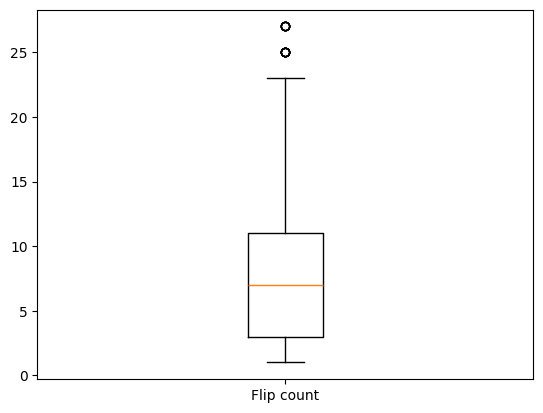

In [26]:
# how many times does bitscore flip to 0 in high variance genes? (1 expected)
ogs = set(outlier_genes)
flips_arr = []
for line in open('EvA.matrix.tsv', 'r'):
    id = line.split('\t', 1)[0]
    if id not in ogs: continue
    flips = 0
    state = bool(line.split('\t', 2)[1])
    for i, score in enumerate(line.strip().split('\t')[2:]):
        score = float(score) != 0
        if bool(score) != state:
            flips += 1
            state = bool(score)
            #print(i)
    print(flips, id)
    flips_arr.append(flips)
plt.boxplot(flips_arr, tick_labels=['Flip count'])

### PC1 Jumps

Text(0.5, 1.0, 'PCA')

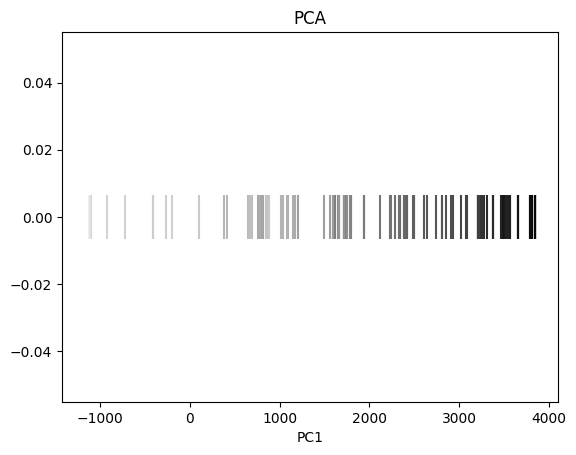

In [14]:
plt.scatter(data_p[:,0], np.zeros_like(data_p[:,1]), marker='|', s=1000, c=range(362), cmap='gray', vmin=0, vmax=150)
plt.xlabel('PC1')
#plt.ylabel('PC2')
plt.title('PCA')

In [15]:
# largest jumps; expect negative jumps
dt = data_p[:, 0]
jmp = dt[1:] - dt[:-1]
big_idx = np.where(jmp < -500)[0]
jmp[big_idx], big_idx

(array([-662.27387727, -781.87983692, -517.63297072, -529.64830461]),
 array([106, 117, 118, 122]))

In [16]:
# significant positive jumps, i.e. in opposite of expected direction
rev_idx = np.where(jmp > 100)
jmp[rev_idx], rev_idx

(array([172.3463226 , 104.23611741, 390.43583723, 231.49809508,
        172.41170466, 146.63232225]),
 (array([ 74,  82, 100, 108, 112, 120]),))

0 0 YP_002385298|FEATURES|mdtN|multidrug|mdtN
0 0 gi:585322871:ref:WP_024204537.1:|FEATURES|emrA|multidrug|emrA
0 0 JQ002629.1.gene1.p01|FEATURES|IMP-32|beta-lactam|IMP
0 0 gi:651585284:ref:WP_026580461.1:|FEATURES|class_A|beta-lactam|class_A
0 0 Q32DT3|FEATURES|arnA|polymyxin|arnA
0 0 gi:585350004:ref:WP_024231618.1:|FEATURES|TolC|multidrug|TolC
0 0 gi:1015890335:ref:WP_062865166.1:|FEATURES|macB|MLS|macB
0 0 ZP_04273511|FEATURES|class_A|beta-lactam|class_A
97.8 93.6 gi:1031652761:gb:ANG23007.1:|FEATURES|TEM-1|beta-lactam|TEM
0 0 gi:727197287:ref:WP_033658847.1:|FEATURES|class_A|beta-lactam|class_A
0 0 gi:662754041:ref:WP_030125200.1:|FEATURES|multidrug_ABC_transporter|multidrug|multidrug_ABC_transporter
97.1 92.4 gi:1031626545:gb:ANG10578.1:|FEATURES|TEM-1|beta-lactam|TEM
0 0 gi:1031635111:gb:ANG14588.1:|FEATURES|TEM-1|beta-lactam|TEM
105 100 AF452105.1.gene1.p1|FEATURES|LEN-15|beta-lactam|LEN
0 0 DQ075245.1.gene1.p01|FEATURES|TEM-143|beta-lactam|TEM
0 0 P52664|FEATURES|class_A|beta-

Text(0.5, 0, 'Change in bitscore')

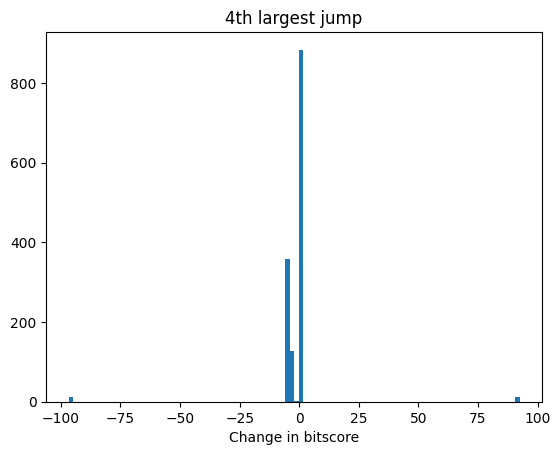

In [36]:
# biggest jump bitscore before/after in outlier genes
jmp_start = big_idx[3]
jmp_end = jmp_start + 1
ogs = set(outlier_genes)
changes = []
for line in open('EvA.matrix.tsv', 'r'):
    id = line.split('\t', 1)[0]
    if id not in ogs: continue
    scores = line.strip().split('\t')[1:]
    print(scores[jmp_start], scores[jmp_end], id)
    change = float(scores[jmp_end]) - float(scores[jmp_start])
    changes.append(change)
changes_nz = [x for x in changes if x > 0]
plt.hist(changes, bins=100)
plt.title('4th largest jump')
plt.xlabel('Change in bitscore')
#plt.yscale('log')